In [104]:
import pandas as pd
df = pd.read_csv("C:\\Users\\tharu\\Downloads\\data_for_lr.xls - data_for_lr.xls.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [106]:
df.shape

(200, 4)

In [107]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [108]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [109]:
df.value_counts()

TV     Radio  Newspaper  Sales
0.7    39.6   8.7        1.6      1
206.9  8.4    26.4       17.9     1
197.6  3.5    5.9        16.7     1
       23.3   14.2       16.6     1
198.9  49.4   60.0       23.7     1
                                 ..
97.5   7.6    7.2        13.7     1
100.4  9.6    3.6        10.7     1
102.7  29.6   8.4        14.0     1
104.6  5.7    34.4       10.4     1
296.4  36.3   100.9      23.8     1
Length: 200, dtype: int64

In [110]:
# to check perticular column
df['Newspaper'].value_counts()

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: Newspaper, Length: 172, dtype: int64

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

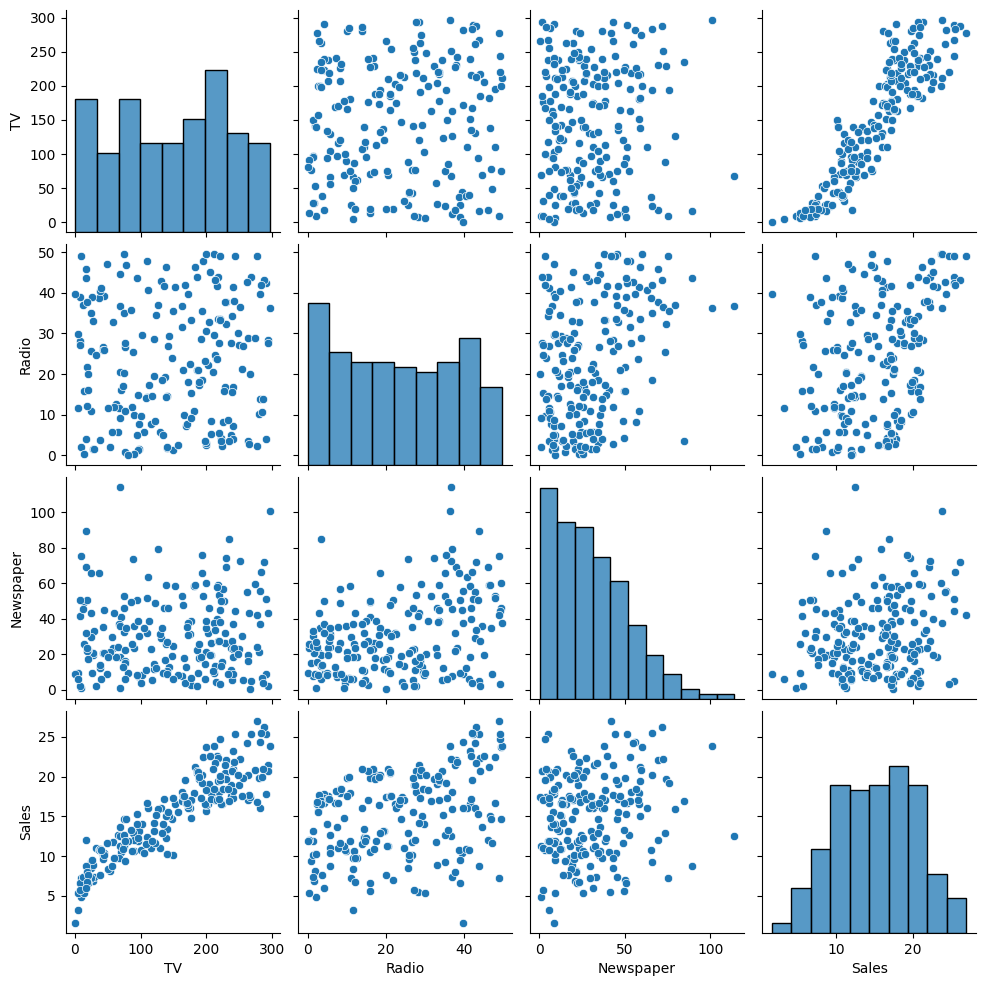

In [112]:
sns.pairplot(df)

In [113]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


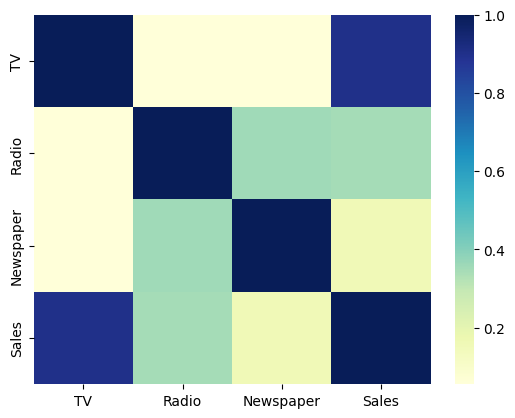

In [114]:
# Graphical view of correlation
# Cmx=1,Cmi=0
# Tv to Sales high corelated andd sales are more
# Radio is little bit highr then Newspaper
# This shows Co-relation of attributes vs label

# *** If any attribue is very less corelative drop it else that column is more imp.
sns.heatmap(df.corr(), cmap = 'YlGnBu')
plt.show()

Building the line equation to form a line in linear regression
y= mx+c
m = parameters of data or Slope
x = independent variable
y = dependent variable/label/target variable
c = Constant

In above data:
x = Tv, Radio, Newspaper
y = Sales

In [115]:
x = df['TV']
y = df['Sales']

X_train, X_test, Y_train, Y_test
By default split -> (75,25)
75% is train and 25% is test
But we also choose any values like 80,20/70,30 etc.

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size= 0.8, test_size= 0.2, random_state=2)

In [118]:
X_train.head()

137    273.7
163    163.5
111    241.7
123    123.1
109    255.4
Name: TV, dtype: float64

x, y - Train selected random data to train

In [119]:
Y_train.head()

137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
Name: Sales, dtype: float64

Statistical models is used to simplify our work
OLS - ordinary least square

In [120]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [121]:
li_reg_mdl = sm.OLS(Y_train, X_train_sm).fit()

In [122]:
li_reg_mdl.params

const    6.574521
TV       0.058386
dtype: float64

In [123]:
li_reg_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     800.9
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           9.40e-64
Time:                        21:03:16   Log-Likelihood:                -354.40
No. Observations:                 160   AIC:                             712.8
Df Residuals:                     158   BIC:                             719.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5745      0.347     18.943      0.000       5.889       7.260
TV             0.0584      0.002     28.301      0.000       0.054       0.062
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.142
Skew:                          -0.066   Prob(JB):                        0.931
Kurtosis:                       2.938   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RMS- Root Mean Square

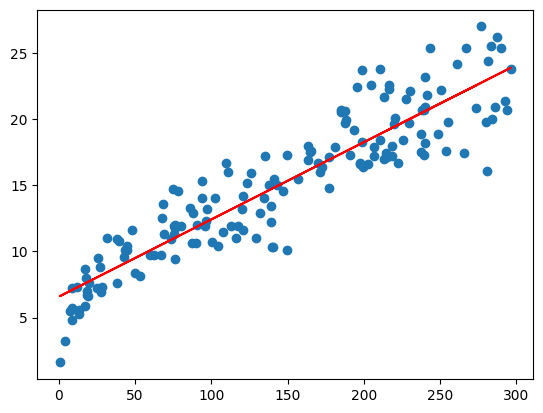

In [124]:
plt.scatter(X_train, Y_train)
y = 0.058386*X_train+ 6.574521
plt.plot(X_train, y, color = 'red')

In [125]:
Y_train_pred = li_reg_mdl.predict(X_train_sm)
errors = (Y_train - Y_train_pred)

In [126]:
errors

137   -1.754728
163    1.879393
111    1.113619
123    1.438181
109   -1.686267
         ...   
43    -0.754553
22    -1.745214
72     0.660738
15     4.416884
168   -2.050833
Length: 160, dtype: float64

C:\Users\tharu\AppData\Local\Temp\ipykernel_14504\909450435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, bins=20)


<AxesSubplot: ylabel='Density'>

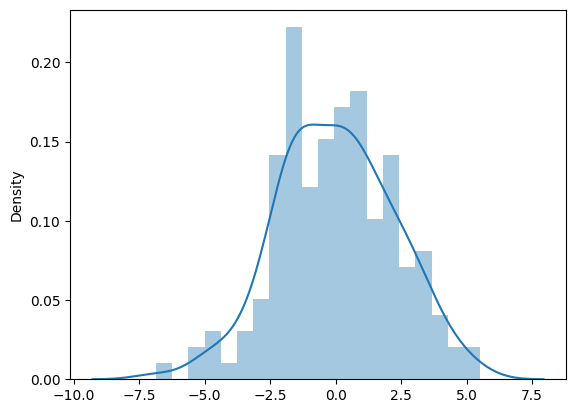

In [127]:
fig = plt.figure()
sns.distplot(errors, bins=20)

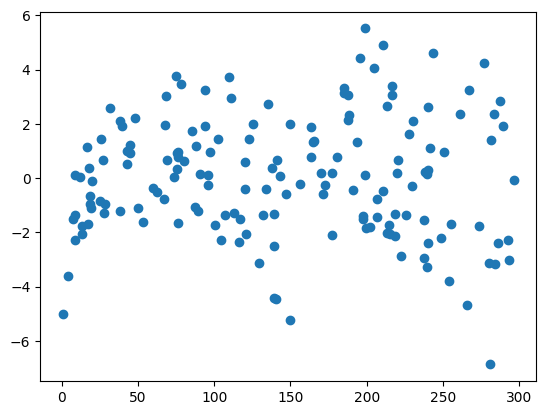

In [128]:
plt.scatter(X_train, errors)

In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
Y_preds = li_reg_mdl.predict(X_test_sm)

In [131]:
Y_preds

112    16.832915
29     10.696562
182     9.855806
199    20.125876
193    16.313281
85     17.854667
10     10.433826
54     21.912483
115    10.959298
35     23.547287
12      7.964104
92     19.285120
13     12.267141
126     7.029931
174    19.559534
2       7.578758
44      8.040006
3      15.419977
113    18.812195
14     18.491073
23     19.904010
25     21.924161
6       9.931707
134     8.728959
165    20.266002
173    16.406698
45     16.797883
65     10.603145
48     19.839786
122    19.652951
178    22.729885
64     14.228906
9      18.240014
57     14.526674
78      6.889805
71     12.985287
128    19.436923
176    21.077566
131    22.058448
53     17.235777
dtype: float64

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [133]:
import numpy as np
np.sqrt(mean_squared_error(Y_test, Y_preds))

2.5977527204946074

In [134]:
r_score = r2_score(Y_test, Y_preds)

In [135]:
r_score

0.6523236772792507

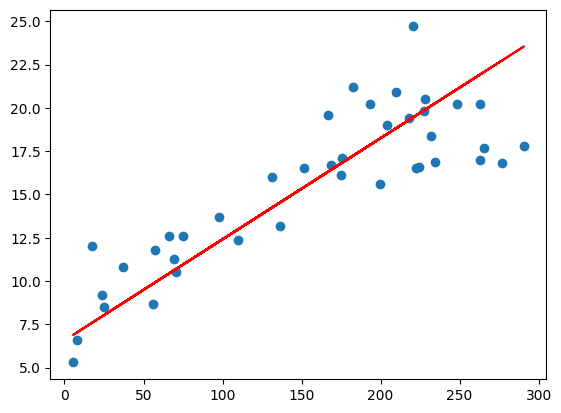

In [136]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 0.058386*X_test + 6.574521, color='red')
plt.show()

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import  RFE
from sklearn.linear_model import LogisticRegression

In [138]:
df = pd.read_csv("D:\One Drive Storage\OneDrive\Desktop\DataSets\\titanic.csv")
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [139]:
df['Survived'].unique()

array([nan])

In [140]:
df['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [141]:
# df.drop('Survived', axis= 1, inplace=True)


In [142]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [143]:
df['Cabin'].nunique()

76

In [144]:
df.shape

(418, 14)

In [145]:
df['Cabin'].isna().sum()

327

In [146]:
df.drop("Cabin", axis=1, inplace=True)

In [147]:
df.head(5)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [148]:
df.isna().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [149]:
df.drop("Title", axis=1, inplace=True)

In [150]:
df.head(5)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size
0,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,0
1,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,1
2,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,0
3,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,0
4,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    object 
 2   Fare         418 non-null    float64
 3   Name         418 non-null    object 
 4   Parch        418 non-null    int64  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Sex          418 non-null    object 
 8   SibSp        418 non-null    int64  
 9   Survived     0 non-null      float64
 10  Ticket       418 non-null    object 
 11  Family_Size  418 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 39.3+ KB


In [152]:
df[['First_Name', 'Last_Name']] = df["Name"].str.split(',', expand=True)

In [153]:
df.head(5)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,First_Name,Last_Name
0,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,0,Kelly,Mr. James
1,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,1,Wilkes,Mrs. James (Ellen Needs)
2,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,0,Myles,Mr. Thomas Francis
3,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,0,Wirz,Mr. Albert
4,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,2,Hirvonen,Mrs. Alexander (Helga E Lindqvist)


In [154]:
df.drop("Name", axis=1, inplace=True)

In [155]:
df.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,First_Name,Last_Name
0,34.5,Q,7.8292,0,892,3,male,0,NaN,330911,0,Kelly,Mr. James
1,47.0,S,7.0000,0,893,3,female,1,NaN,363272,1,Wilkes,Mrs. James (Ellen Needs)
2,62.0,Q,9.6875,0,894,2,male,0,NaN,240276,0,Myles,Mr. Thomas Francis
3,27.0,S,8.6625,0,895,3,male,0,NaN,315154,0,Wirz,Mr. Albert
4,22.0,S,12.2875,1,896,3,female,1,NaN,3101298,2,Hirvonen,Mrs. Alexander (Helga E Lindqvist)


In [156]:
df.drop("Last_Name", axis=1, inplace=True)

In [157]:
df.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,First_Name
0,34.5,Q,7.8292,0,892,3,male,0,NaN,330911,0,Kelly
1,47.0,S,7.0000,0,893,3,female,1,NaN,363272,1,Wilkes
2,62.0,Q,9.6875,0,894,2,male,0,NaN,240276,0,Myles
3,27.0,S,8.6625,0,895,3,male,0,NaN,315154,0,Wirz
4,22.0,S,12.2875,1,896,3,female,1,NaN,3101298,2,Hirvonen


In [158]:
df.columns = df.columns.str.replace('First_Name', "Name")

In [159]:
df

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Name
0,34.5,Q,7.8292,0,892,3,male,0,NaN,330911,0,Kelly
1,47.0,S,7.0000,0,893,3,female,1,NaN,363272,1,Wilkes
2,62.0,Q,9.6875,0,894,2,male,0,NaN,240276,0,Myles
3,27.0,S,8.6625,0,895,3,male,0,NaN,315154,0,Wirz
4,22.0,S,12.2875,1,896,3,female,1,NaN,3101298,2,Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,S,8.0500,0,1305,3,male,0,NaN,A.5. 3236,0,Spector
414,39.0,C,108.9000,0,1306,1,female,0,NaN,PC 17758,0,Oliva y Ocana
415,38.5,S,7.2500,0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,0,Saether
416,30.0,S,8.0500,0,1308,3,male,0,NaN,359309,0,Ware


In [253]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp',
       'Survived', 'Ticket', 'Family_Size', 'Name'],
      dtype='object')

In [160]:
sex_dumm= pd.get_dummies(df["Sex"])
sex_dumm

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [161]:
final_df = pd.concat([df,sex_dumm],axis=1)

In [162]:
final_df.head(5)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Name,female,male
0,34.5,Q,7.8292,0,892,3,male,0,NaN,330911,0,Kelly,0,1
1,47.0,S,7.0000,0,893,3,female,1,NaN,363272,1,Wilkes,1,0
2,62.0,Q,9.6875,0,894,2,male,0,NaN,240276,0,Myles,0,1
3,27.0,S,8.6625,0,895,3,male,0,NaN,315154,0,Wirz,0,1
4,22.0,S,12.2875,1,896,3,female,1,NaN,3101298,2,Hirvonen,1,0


In [163]:
df.drop("Sex", axis = 1, inplace=True)

In [164]:
df

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Family_Size,Name
0,34.5,Q,7.8292,0,892,3,0,NaN,330911,0,Kelly
1,47.0,S,7.0000,0,893,3,1,NaN,363272,1,Wilkes
2,62.0,Q,9.6875,0,894,2,0,NaN,240276,0,Myles
3,27.0,S,8.6625,0,895,3,0,NaN,315154,0,Wirz
4,22.0,S,12.2875,1,896,3,1,NaN,3101298,2,Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,S,8.0500,0,1305,3,0,NaN,A.5. 3236,0,Spector
414,39.0,C,108.9000,0,1306,1,0,NaN,PC 17758,0,Oliva y Ocana
415,38.5,S,7.2500,0,1307,3,0,NaN,SOTON/O.Q. 3101262,0,Saether
416,30.0,S,8.0500,0,1308,3,0,NaN,359309,0,Ware


<AxesSubplot: >

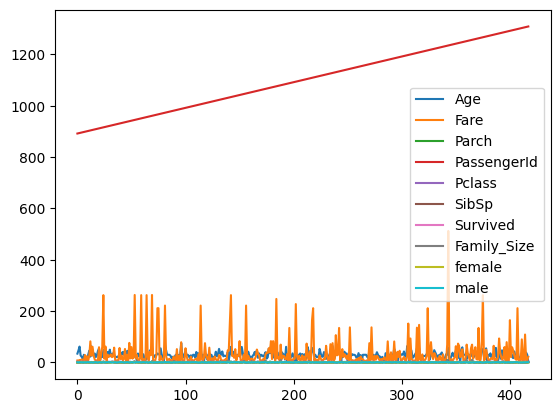

In [165]:
final_df.plot()

In [ ]:
# plt.figure()
# plt.xlim(0,120)
# final_df

In [167]:
final_df["Pclass"].unique()

array([3, 2, 1], dtype=int64)

<AxesSubplot: ylabel='Frequency'>

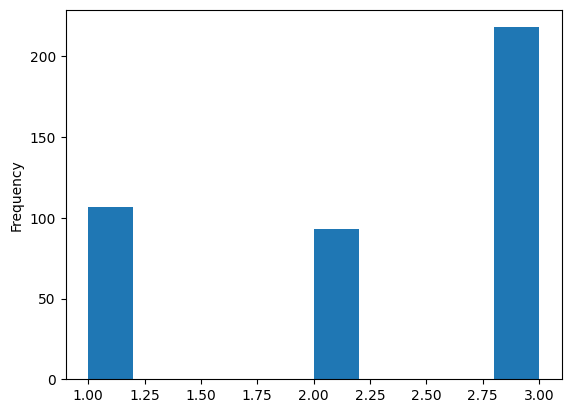

In [168]:
final_df["Pclass"].plot(kind="hist")

In [169]:
final_df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

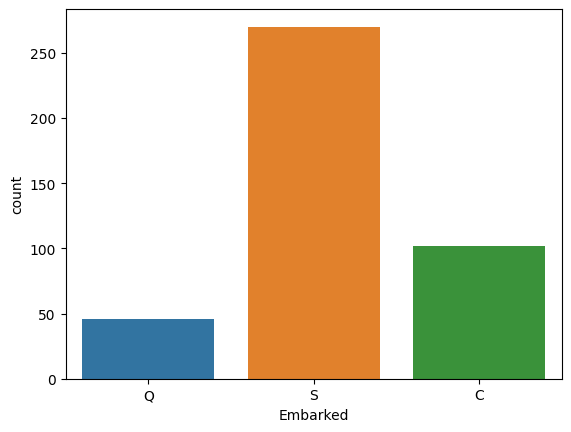

In [170]:
sns.countplot(x="Embarked", data= final_df)

In [171]:
df

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Family_Size,Name
0,34.5,Q,7.8292,0,892,3,0,NaN,330911,0,Kelly
1,47.0,S,7.0000,0,893,3,1,NaN,363272,1,Wilkes
2,62.0,Q,9.6875,0,894,2,0,NaN,240276,0,Myles
3,27.0,S,8.6625,0,895,3,0,NaN,315154,0,Wirz
4,22.0,S,12.2875,1,896,3,1,NaN,3101298,2,Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,S,8.0500,0,1305,3,0,NaN,A.5. 3236,0,Spector
414,39.0,C,108.9000,0,1306,1,0,NaN,PC 17758,0,Oliva y Ocana
415,38.5,S,7.2500,0,1307,3,0,NaN,SOTON/O.Q. 3101262,0,Saether
416,30.0,S,8.0500,0,1308,3,0,NaN,359309,0,Ware


In [172]:
add_clm = pd.get_dummies(final_df, columns=["Embarked", "Pclass"])
add_clm.head(5)

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,7.8292,0,892,male,0,NaN,330911,0,Kelly,0,1,0,1,0,0,0,1
1,47.0,7.0000,0,893,female,1,NaN,363272,1,Wilkes,1,0,0,0,1,0,0,1
2,62.0,9.6875,0,894,male,0,NaN,240276,0,Myles,0,1,0,1,0,0,1,0
3,27.0,8.6625,0,895,male,0,NaN,315154,0,Wirz,0,1,0,0,1,0,0,1
4,22.0,12.2875,1,896,female,1,NaN,3101298,2,Hirvonen,1,0,0,0,1,0,0,1


In [177]:
df

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Family_Size,Name
0,34.5,Q,7.8292,0,892,3,0,NaN,330911,0,Kelly
1,47.0,S,7.0000,0,893,3,1,NaN,363272,1,Wilkes
2,62.0,Q,9.6875,0,894,2,0,NaN,240276,0,Myles
3,27.0,S,8.6625,0,895,3,0,NaN,315154,0,Wirz
4,22.0,S,12.2875,1,896,3,1,NaN,3101298,2,Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,S,8.0500,0,1305,3,0,NaN,A.5. 3236,0,Spector
414,39.0,C,108.9000,0,1306,1,0,NaN,PC 17758,0,Oliva y Ocana
415,38.5,S,7.2500,0,1307,3,0,NaN,SOTON/O.Q. 3101262,0,Saether
416,30.0,S,8.0500,0,1308,3,0,NaN,359309,0,Ware


In [176]:
df['Survived'].isna().sum()

418

In [202]:
import random
lst = [0]*318 + [1]*100
random.shuffle(lst)

In [203]:
add_clm["survived"] = lst

In [204]:
add_clm.head(5)

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,survived
0,34.5,7.8292,0,892,male,0,NaN,330911,0,Kelly,0,1,0,1,0,0,0,1,0
1,47.0,7.0000,0,893,female,1,NaN,363272,1,Wilkes,1,0,0,0,1,0,0,1,1
2,62.0,9.6875,0,894,male,0,NaN,240276,0,Myles,0,1,0,1,0,0,1,0,0
3,27.0,8.6625,0,895,male,0,NaN,315154,0,Wirz,0,1,0,0,1,0,0,1,0
4,22.0,12.2875,1,896,female,1,NaN,3101298,2,Hirvonen,1,0,0,0,1,0,0,1,0


In [205]:
add_clm.drop("Survived", axis = 1, inplace = True)

In [209]:
add_clm.head(5)

,Age,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,survived
0,34.5,7.8292,0,892,male,0,330911,0,Kelly,0,1,0,1,0,0,0,1,0
1,47.0,7.0000,0,893,female,1,363272,1,Wilkes,1,0,0,0,1,0,0,1,1
2,62.0,9.6875,0,894,male,0,240276,0,Myles,0,1,0,1,0,0,1,0,0
3,27.0,8.6625,0,895,male,0,315154,0,Wirz,0,1,0,0,1,0,0,1,0
4,22.0,12.2875,1,896,female,1,3101298,2,Hirvonen,1,0,0,0,1,0,0,1,0


In [257]:
X_ = df[['Age','Fare', 'Parch', 'PassengerId', 'Pclass', "SibSp", "Ticket", "Family_Size"]]
Y_ = pd.DataFrame(lst)

In [210]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(add_clm, test_size=0.25)

In [211]:
X_train = train.copy()

In [212]:
X_train.drop("survived", axis=1, inplace=True)

In [213]:
X_train.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
325,23.0,7.0500,0,1217,male,0,SOTON/O.Q. 3101309,0,Assam,0,1,0,0,1,0,0,1
198,23.0,10.5000,0,1090,male,0,C.A. 31030,0,Baimbrigge,0,1,0,0,1,0,1,0
338,25.0,31.5000,0,1230,male,0,C.A. 31029,0,Denbury,0,1,0,0,1,0,1,0
44,45.0,52.5542,0,936,female,1,11753,1,Kimball,1,0,0,0,1,1,0,0
128,42.0,13.0000,0,1020,male,0,211535,0,Bowenur,0,1,0,0,1,0,1,0


In [192]:
X_train.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
283,9.0,15.2458,1,1175,female,1,NaN,2650,2,Touma,1,0,1,0,0,0,0,1
80,6.0,15.2458,1,972,male,1,NaN,2678,2,Boulos,0,1,1,0,0,0,0,1
88,22.0,7.7500,0,980,female,0,NaN,364856,0,O'Donoghue,1,0,0,1,0,0,0,1
388,21.0,7.7500,0,1280,male,0,NaN,364858,0,Canavan,0,1,0,1,0,0,0,1
278,30.0,21.0000,0,1170,male,1,NaN,CA 31352,1,Ware,0,1,0,0,1,0,1,0


In [214]:
Y_train = train["survived"]
Y_train.head()

325    1
198    0
338    0
44     0
128    0
Name: survived, dtype: int64

In [215]:
X_test = test.copy()

In [216]:
X_test.drop("survived",  axis=1, inplace=True)

In [239]:
X_test.head(5)

,Age,Fare,Parch,PassengerId,Sex,SibSp,Ticket,Family_Size,Name,female,male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
319,22.0,31.5000,0,1211,male,2,C.A. 31029,2,Jefferys,0,1,0,0,1,0,1,0
135,24.0,7.8542,0,1027,male,0,350409,0,Carlsson,0,1,0,0,1,0,0,1
360,14.5,69.5500,2,1252,male,8,CA. 2343,10,Sage,0,1,0,0,1,0,0,1
412,28.0,7.7750,0,1304,female,0,347086,0,Henriksson,1,0,0,0,1,0,0,1
262,29.0,23.0000,2,1154,female,0,29103,2,Wells,1,0,0,0,1,0,1,0


In [238]:
Y_test = test["survived"]
Y_test.head()

319    0
135    0
360    1
412    1
262    0
Name: survived, dtype: int64

In [246]:
# colm = ['Age', 'Fare', 'Pclass_3', 'Family_Size', "Embarked_S"]
# X_train.drop("Ticket", axis=1, inplace=True)
colm = X_train.columns

In [247]:
colm

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Family_Size',
       'Name', 'female', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [248]:
X = X_train[colm]
Y = Y_train

In [249]:
model = LogisticRegression()

In [251]:
r_f_e = RFE(model)

In [252]:
r_f_e.fit(X,Y)

ValueError: could not convert string to float: 'male'

In [235]:
X.columns[r_f_e.support_]

Index(['Age', 'Family_Size'], dtype='object')